In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime

In [2]:
start=datetime(2019,1,1)
end=datetime.today().date()
# end.date()
df=yf.download("AAPL",start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.943256,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.163830,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.622257,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.542973,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.220531,164101200


In [3]:
df=df.reset_index().drop(["Adj Close","Date"],axis=1)

import matplotlib.pyplot as plt
df.head()

,Open,High,Low,Close,Volume
0,38.722500,39.712502,38.557499,39.480000,148158800
1,35.994999,36.430000,35.500000,35.547501,365248800
2,36.132500,37.137501,35.950001,37.064999,234428400
3,37.174999,37.207500,36.474998,36.982498,219111200
4,37.389999,37.955002,37.130001,37.687500,164101200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1195 non-null   float64
 1   High    1195 non-null   float64
 2   Low     1195 non-null   float64
 3   Close   1195 non-null   float64
 4   Volume  1195 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 46.8 KB


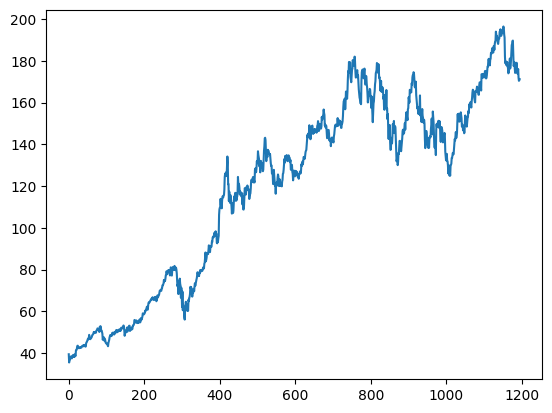

In [4]:
plt.plot(df["Close"])
df.info()

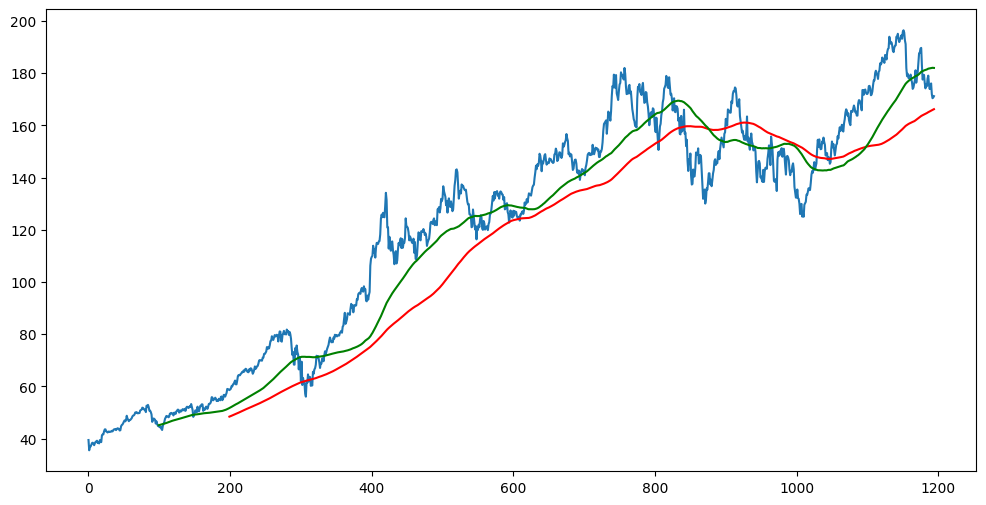

In [5]:
ma200=df.Close.rolling(200).mean()
ma100=df.Close.rolling(100).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,"r")
plt.plot(ma100,"g")

In [6]:
df.shape

(1195, 5)

In [7]:
# split 70 30
i=int(len(df)*0.7)
data_training=pd.DataFrame(df.Close[0:i])
data_test=pd.DataFrame(df.Close[i:])
print(data_test.shape)
print(data_training.shape)
print(df.shape)

(359, 1)
(836, 1)
(1195, 5)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_training_array=scaler.fit_transform(data_training)
data_training_array.shape


(836, 1)

In [9]:
x_train=[]
y_train=[]
import numpy as np
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
my_x_train=np.array(x_train)
my_y_train=np.array(y_train)
# Y_traina

In [10]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(my_x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=56,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=50,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 56)           23968     
                                                                 
 dropout_1 (Dropout)         (None, 100, 56)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           43840     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [12]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(my_x_train,my_y_train,epochs=50)

Epoch 1/50
23/23 [==============================] - 10s 182ms/step - loss: 0.1405
Epoch 2/50
23/23 [==============================] - 4s 167ms/step - loss: 0.0411
Epoch 3/50
23/23 [==============================] - 4s 174ms/step - loss: 0.0275
Epoch 4/50
23/23 [==============================] - 4s 163ms/step - loss: 0.0195
Epoch 5/50
23/23 [==============================] - 4s 159ms/step - loss: 0.0173
Epoch 6/50
23/23 [==============================] - 4s 159ms/step - loss: 0.0179
Epoch 7/50
23/23 [==============================] - 4s 164ms/step - loss: 0.0169
Epoch 8/50
23/23 [==============================] - 4s 173ms/step - loss: 0.0162
Epoch 9/50
23/23 [==============================] - 4s 183ms/step - loss: 0.0159
Epoch 10/50
23/23 [==============================] - 4s 160ms/step - loss: 0.0145
Epoch 11/50
23/23 [==============================] - 4s 159ms/step - loss: 0.0149
Epoch 12/50
23/23 [==============================] - 4s 159ms/step - loss: 0.0135
Epoch 13/50
23/23 [=====

In [13]:
model.save('AAPL_stock.h5')

c:\Users\Arash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
data_test.tail()

,Close
1190,176.080002
1191,171.960007
1192,170.429993
1193,170.690002
1194,171.210007


In [15]:
past_100=data_training.tail(100)
final_df=past_100.append(data_test,ignore_index=True)
# final_df

D:\Temp\ipykernel_16624\4017944533.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100.append(data_test,ignore_index=True)


In [16]:
final_df.head()

,Close
0,163.759995
1,161.839996
2,165.320007
3,171.179993
4,175.080002


In [17]:
input_data=scaler.fit_transform(final_df)
input_data.shape

(459, 1)

In [18]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
# x_test.shape
#     X_train.append(data_training_array[i-100:i])
    # Y_train.append(data_training_array[i:0])
    

x_test=np.array(x_test)
y_test=np.array(y_test)
# x_test = x_test.astype(np.float64)
# y_test = y_test.astype(np.float64)
# print(x_test[1])

In [19]:
print(y_test[1])
# print(x_test[1])
print(x_test)

0.540669222757705
[[[0.54234912]
  [0.51546968]
  [0.56418886]
  ...
  [0.51476966]
  [0.53002951]
  [0.44491119]]

 [[0.51546968]
  [0.56418886]
  [0.64622702]
  ...
  [0.53002951]
  [0.44491119]
  [0.44169131]]

 [[0.56418886]
  [0.64622702]
  [0.70082605]
  ...
  [0.44491119]
  [0.44169131]
  [0.54066922]]

 ...

 [[0.57076854]
  [0.67968655]
  [0.67870647]
  ...
  [0.69676601]
  [0.71482577]
  [0.657147  ]]

 [[0.67968655]
  [0.67870647]
  [0.65448701]
  ...
  [0.71482577]
  [0.657147  ]
  [0.63572723]]

 [[0.67870647]
  [0.65448701]
  [0.67954642]
  ...
  [0.657147  ]
  [0.63572723]
  [0.63936729]]]


In [20]:
y_predict=model.predict(x_test)
# y_predict.shape
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


12/12 [==============================] - 2s 74ms/step


0.7651203510451721

In [21]:
y_predict

array([[0.6185752 ],
       [0.6138112 ],
       [0.60829246],
       [0.60213894],
       [0.5955032 ],
       [0.5885538 ],
       [0.5815966 ],
       [0.57474566],
       [0.56804717],
       [0.5614147 ],
       [0.5547929 ],
       [0.5480026 ],
       [0.54078805],
       [0.5330275 ],
       [0.5245107 ],
       [0.5152194 ],
       [0.50449586],
       [0.49135393],
       [0.47551218],
       [0.4568081 ],
       [0.43535787],
       [0.4116021 ],
       [0.38682413],
       [0.3621473 ],
       [0.33917218],
       [0.3187235 ],
       [0.30135214],
       [0.2871353 ],
       [0.27604136],
       [0.26790497],
       [0.2624669 ],
       [0.25936297],
       [0.25743622],
       [0.2555567 ],
       [0.2530137 ],
       [0.24972765],
       [0.2459623 ],
       [0.24180423],
       [0.23748864],
       [0.23301278],
       [0.22853185],
       [0.22425617],
       [0.22042243],
       [0.21715808],
       [0.21452846],
       [0.21251538],
       [0.21109079],
       [0.210

In [22]:
scaler.scale_
# y_test.shape

array([0.01399972])

In [23]:
scale_factor=1 / 0.01754694
y_predict=scale_factor*y_predict
y_test=scale_factor* y_test

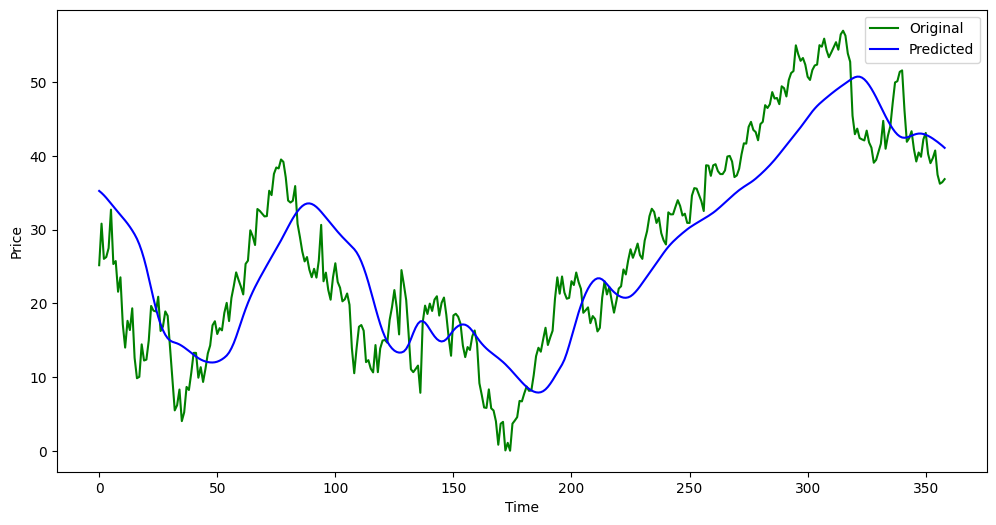

In [24]:
plt.figure(figsize=(12,6))
plt.plot(y_test,"g",label="Original")
plt.plot(y_predict,"b",label="Predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [25]:
y_predict

array([[35.252598 ],
       [34.9811   ],
       [34.666584 ],
       [34.315895 ],
       [33.937725 ],
       [33.541676 ],
       [33.145187 ],
       [32.754753 ],
       [32.373005 ],
       [31.995022 ],
       [31.617643 ],
       [31.230665 ],
       [30.819508 ],
       [30.377235 ],
       [29.891861 ],
       [29.36235  ],
       [28.751217 ],
       [28.002258 ],
       [27.099436 ],
       [26.033491 ],
       [24.811043 ],
       [23.457201 ],
       [22.045105 ],
       [20.638773 ],
       [19.32942  ],
       [18.164051 ],
       [17.174057 ],
       [16.36384  ],
       [15.731595 ],
       [15.267902 ],
       [14.957988 ],
       [14.781094 ],
       [14.6712885],
       [14.564175 ],
       [14.41925  ],
       [14.231977 ],
       [14.01739  ],
       [13.780421 ],
       [13.534476 ],
       [13.279397 ],
       [13.024029 ],
       [12.780358 ],
       [12.561873 ],
       [12.375837 ],
       [12.225975 ],
       [12.111251 ],
       [12.030063 ],
       [11.98

1/1 [==============================] - 0s 46ms/step


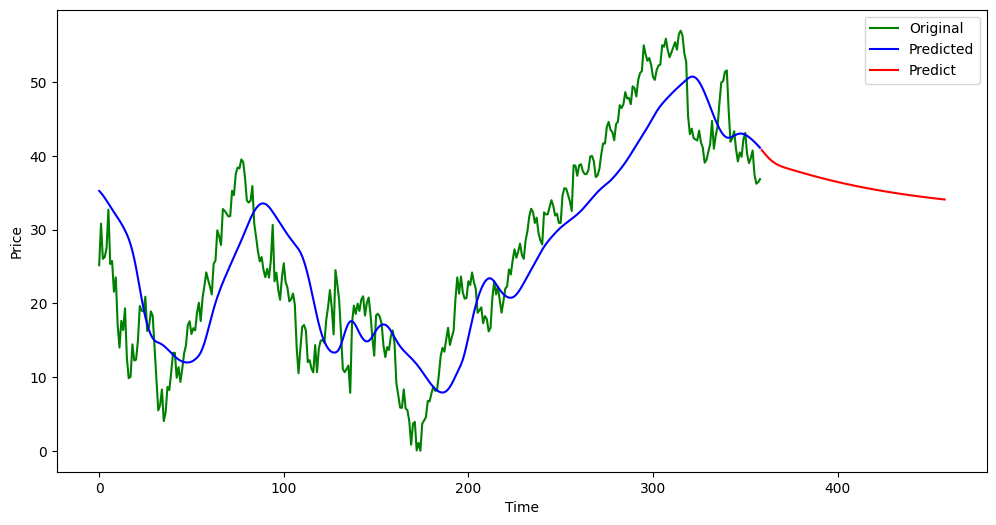

In [26]:

past_100 = final_df.tail(100)
input_data = scaler.transform(past_100)
future_predictions = []
for i in range(100):
    x_input = input_data[-100:].reshape((1, 100, 1))
    y_pred = model.predict(x_input)
    future_predictions.append(y_pred[0, 0])
    input_data = np.append(input_data, y_pred)
    input_data = np.delete(input_data, 0)
future_predictions = np.array(future_predictions)
future_predictions = future_predictions * scale_factor

plt.figure(figsize=(12,6))
plt.plot(y_test,"g",label="Original")
plt.plot(y_predict,"b",label="Predicted")
plt.plot(range(len(y_test), len(y_test) + len(future_predictions)), future_predictions, "r", label="Predict")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()